In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
import pickle as pkl

from utils.generate import Generate 
generate = Generate()
from utils.process import Categorize
categorize = Categorize()

In [2]:
df = pd.read_parquet('./data/df.parquet')

In [3]:
df.shape

(12000, 8)

In [4]:
df.head()

,Id,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,THY
0,1000,2021-02-12 03:00:00,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,1310.40
1,1001,2021-08-22 19:00:00,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,3979.80
14,1002,2021-01-13 09:00:00,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,2341.35
3,1003,2021-10-24 05:00:00,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,1190.40
22,1004,2021-07-11 07:00:00,YHT,Ankara - İstanbul,C,265.91,35,673.92


In [5]:
df = df.reset_index()
df.drop('index', axis = 1, inplace= True)

In [6]:
df['Ay'] = df.Tarih.apply(lambda x: x.month)
df['Saat'] = df.Tarih.apply(lambda x: x.hour)
df['Tarih'] = df.Tarih.apply(lambda x: x.date())

In [8]:
df.drop('THY', axis=1, inplace=True)

In [9]:
df.corr()

,Id,Fiyat,Satış,Ay,Saat
Id,1.000000,0.033158,-0.032199,-0.037374,0.007944
Fiyat,0.033158,1.000000,-0.821192,0.007321,0.129115
Satış,-0.032199,-0.821192,1.000000,0.014788,-0.130842
Ay,-0.037374,0.007321,0.014788,1.000000,0.031551
Saat,0.007944,0.129115,-0.130842,0.031551,1.000000


In [10]:
df.head()

,Id,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,Ay,Saat
0,1000,2021-02-12,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,2,3
1,1001,2021-08-22,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,8,19
2,1002,2021-01-13,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,1,9
3,1003,2021-10-24,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,10,5
4,1004,2021-07-11,YHT,Ankara - İstanbul,C,265.91,35,7,7


In [19]:
pps_matrix = pps.matrix(df)

<AxesSubplot:xlabel='x', ylabel='y'>

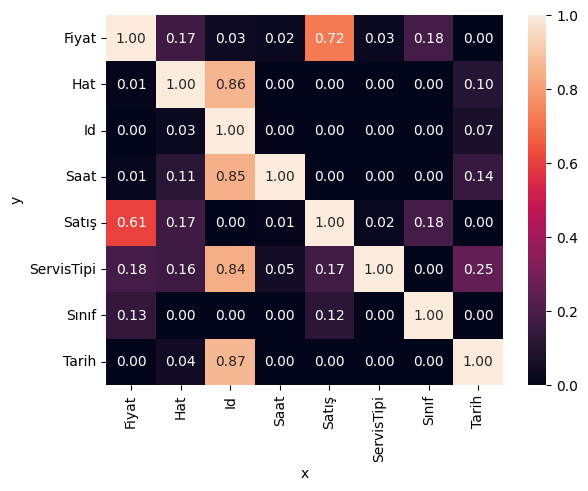

In [20]:
matrix_df = pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f")

In [21]:
matrix_df

x,Fiyat,Hat,Id,Saat,Satış,ServisTipi,Sınıf,Tarih
y,,,,,,,,
Fiyat,1.000000,0.165518,0.031752,0.023665,0.719074,0.027187,0.180396,0.000000
Hat,0.011663,1.000000,0.856459,0.000000,0.000000,0.000000,0.000000,0.098743
Id,0.000000,0.030578,1.000000,0.004736,0.000000,0.000513,0.000000,0.069460
Saat,0.013186,0.109529,0.845939,1.000000,0.000000,0.000000,0.000000,0.141947
Satış,0.607343,0.166933,0.000000,0.010884,1.000000,0.019470,0.180903,0.000000
ServisTipi,0.183154,0.156536,0.843515,0.047642,0.171522,1.000000,0.000000,0.253053
Sınıf,0.134241,0.000000,0.000000,0.000000,0.116869,0.000000,1.000000,0.000000
Tarih,0.000000,0.043027,0.865695,0.000260,0.000000,0.000000,0.000000,1.000000


In [22]:
matrix_df.loc['Satış'].sort_values(ascending=False)

x
Satış         1.000000
Fiyat         0.607343
Sınıf         0.180903
Hat           0.166933
ServisTipi    0.019470
Saat          0.010884
Id            0.000000
Tarih         0.000000
Name: Satış, dtype: float64

In [24]:
Id_Satış = df.groupby('Id')['Satış'].mean().sort_values(ascending=False)

In [25]:
Id_Satış

Id
1688    669.333333
2955    634.500000
2067    627.833333
2286    589.666667
1952    566.166667
           ...    
1144     34.833333
2648     34.833333
1945     33.666667
2278     32.333333
1949     29.833333
Name: Satış, Length: 2000, dtype: float64

In [26]:
for Id in Id_Satış.index[:1]:
    dataframe = df[df['Id'] == Id]
    display(dataframe)

,Id,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,Saat
688,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,C,47.66,445,01:00:00
3444,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,D,43.57,487,01:00:00
3443,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,J,38.13,586,01:00:00
3442,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,M,31.32,713,01:00:00
3441,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,Y,27.23,820,01:00:00
3440,1688,2021-07-11,Ana Hat Bölgesel,Arifiye - Bozöyük,X,23.15,965,01:00:00


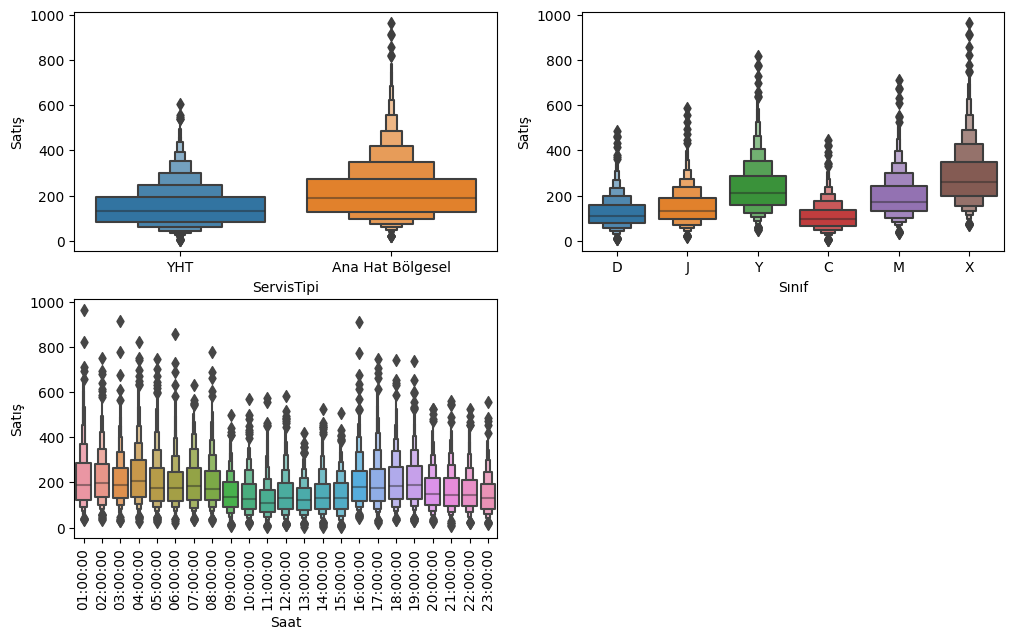

In [143]:
df_boxen = df.select_dtypes(include='object').drop(['Hat','Tarih'], axis=1)
df_copy = df.sort_values('Saat')
plt.figure(figsize=(12,18))
for index, column in enumerate(df_boxen):
    plt.subplot(5,2,index+1)
    sns.boxenplot(data=df_copy, x=column, y='Satış')
    if column == 'Saat':
        plt.xticks(rotation=90);    

# Month Analysis

In [10]:
monthly_sale = df.groupby('Ay')['Satış'].sum()

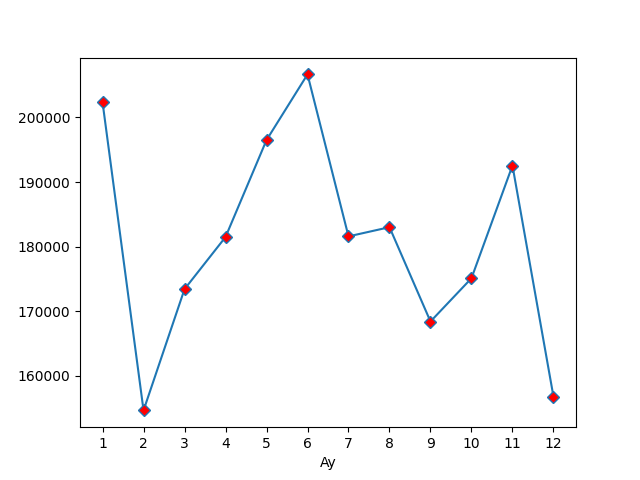

In [11]:
monthly_sale.plot(marker='D', mfc='red')
plt.xticks(monthly_sale.index);

In [13]:
# REASON FOR LOW FEBRUARY ??

In [14]:
monthly_price = df.groupby('Ay')['Fiyat'].median()

In [15]:
monthly_price

Ay
1     104.660
2     108.840
3     104.950
4     107.635
5     107.045
6     102.915
7     109.480
8     107.995
9     106.165
10    104.915
11    107.800
12    106.685
Name: Fiyat, dtype: float64

In [16]:
ay_ranges = generate.generate_numerical_ranges(df.Ay, [4,7,10])
ay_ranges

[range(0, 4), range(4, 7), range(7, 10), range(10, 18)]

In [17]:
ay_dict = categorize.categorize_numerical_variable(df.Ay, ay_ranges)

In [18]:
df['Ay_Grupları'] = df['Ay'].map(ay_dict)

<AxesSubplot:xlabel='Ay_Grupları', ylabel='Satış'>

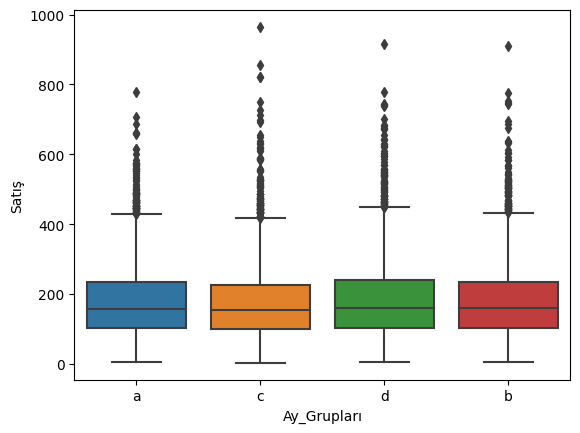

In [19]:
sns.boxplot(x='Ay_Grupları', y='Satış',data=df)

# Route Analysis

In [20]:
start = df.groupby('Hat').mean()['Satış'].min()
finish = df.groupby('Hat').mean()['Satış'].max()

In [21]:
hat_ranges = generate.generate_categorical_ranges(4, start, finish)
hat_ranges

[range(75, 178), range(178, 281), range(281, 384), range(384, 731)]

In [22]:
hat_group = df.groupby('Hat').mean()['Satış']
hat_dict = categorize.categorize_categorical_variable(hat_group, hat_ranges)

In [23]:
df['Hat_Grupları'] = df['Hat'].map(hat_dict)

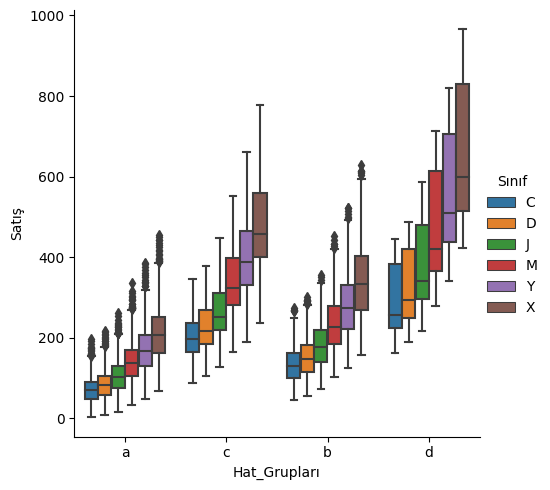

In [24]:
sns.catplot(x='Hat_Grupları', y='Satış', hue='Sınıf', data=df, kind='box')

# Time Analysis

In [13]:
start = df.groupby('Saat').mean()['Satış'].min()
finish = df.groupby('Saat').mean()['Satış'].max()

In [14]:
saat_ranges = generate.generate_categorical_ranges(2, start, finish)
saat_ranges

[range(127, 178), range(178, 344)]

In [15]:
saat_group = df.groupby('Saat').mean()['Satış']
saat_dict = categorize.categorize_categorical_variable(saat_group, saat_ranges)
df['Saat_Grupları'] = df['Saat'].map(saat_dict)

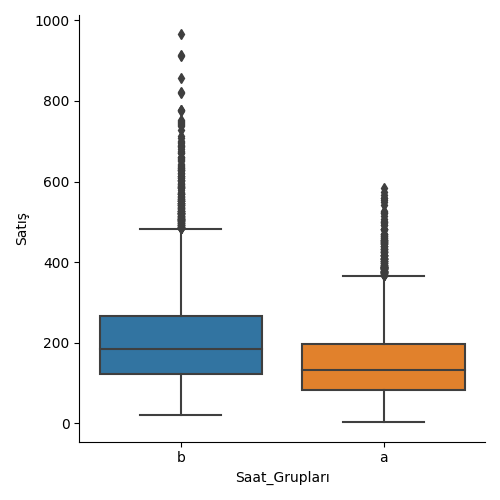

In [16]:
sns.catplot(x='Saat_Grupları', y='Satış', data=df, kind='box')

In [29]:
df

,Id,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,Ay,Saat,Ay_Grupları,Hat_Grupları,Saat_Grupları
0,1000,2021-02-12,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,2,3,a,a,b
1,1001,2021-08-22,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,8,19,c,c,b
2,1002,2021-01-13,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,1,9,a,b,a
3,1003,2021-10-24,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,10,5,d,a,b
4,1004,2021-07-11,YHT,Ankara - İstanbul,C,265.91,35,7,7,c,a,b
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2995,2021-12-13,YHT,Gebze - Bostancı,X,83.54,184,12,19,d,a,b
11996,2996,2021-07-02,YHT,Söğütlüçeşme - İzmit,X,85.54,184,7,14,c,a,a
11997,2997,2021-09-21,Ana Hat Bölgesel,Bozöyük - Söğütlüçeşme,X,56.18,329,9,13,c,b,a
11998,2998,2021-10-04,YHT,Bakırköy - İzmit,X,71.50,227,10,20,d,b,a


# Station Analysis

In [30]:
df['Kalkış'] = df.Hat.apply(lambda x: x.split()[0])
df['Varış'] = df.Hat.apply(lambda x: x.split()[-1])

In [31]:
df.groupby('Kalkış')['Satış'].mean().sort_values(ascending=False)

Kalkış
Arifiye         269.885507
Bozöyük         266.403030
Bilecik         233.834688
İzmit           219.176812
Pendik          206.094488
Polatlı         205.390845
Gebze           202.670573
Eskişehir       184.934667
Bakırköy        162.557778
Eryaman         156.994369
Ankara          145.755208
Söğütlüçeşme    141.016284
Bostancı        135.078483
İstanbul        115.373711
Name: Satış, dtype: float64

In [32]:
df.groupby('Varış')['Satış'].mean().sort_values(ascending=False)

Varış
Arifiye         282.505952
Bozöyük         273.875362
Bilecik         224.440171
İzmit           216.402098
Pendik          208.597222
Polatlı         202.589239
Gebze           192.614428
Eskişehir       175.977541
Bakırköy        168.836518
Eryaman         158.044025
Söğütlüçeşme    148.180921
Ankara          142.946629
Bostancı        134.025100
İstanbul        122.690598
Name: Satış, dtype: float64

# Class Analysis

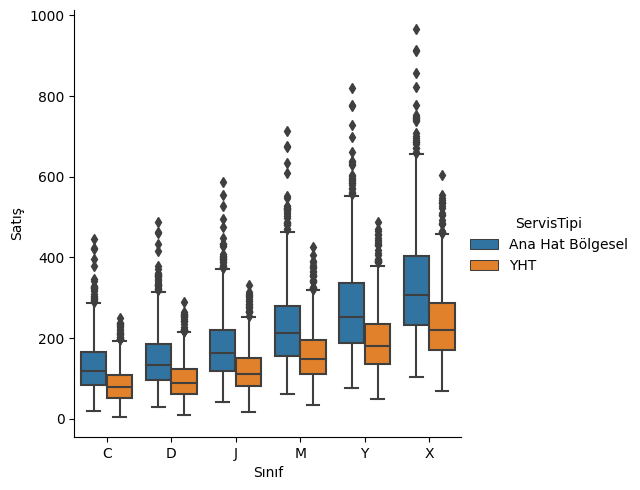

In [7]:
sns.catplot(x='Sınıf', y='Satış', hue='ServisTipi', data=df, kind='box')

# Data Prep

In [34]:
df.head()

,Id,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,Ay,Saat,Ay_Grupları,Hat_Grupları,Saat_Grupları,Kalkış,Varış
0,1000,2021-02-12,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,2,3,a,a,b,İstanbul,Bakırköy
1,1001,2021-08-22,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,8,19,c,c,b,Pendik,Bozöyük
2,1002,2021-01-13,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,1,9,a,b,a,Pendik,Gebze
3,1003,2021-10-24,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,10,5,d,a,b,Söğütlüçeşme,Eskişehir
4,1004,2021-07-11,YHT,Ankara - İstanbul,C,265.91,35,7,7,c,a,b,Ankara,İstanbul


In [35]:
df.drop(columns=['Id','Kalkış','Varış','Tarih'], axis=1, inplace=True)

In [37]:
df.head()

,ServisTipi,Hat,Sınıf,Fiyat,Satış,Ay,Saat,Ay_Grupları,Hat_Grupları,Saat_Grupları
0,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,2,3,a,a,b
1,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,8,19,c,c,b
2,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,1,9,a,b,a
3,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,10,5,d,a,b
4,YHT,Ankara - İstanbul,C,265.91,35,7,7,c,a,b


In [38]:
df1 = df.drop(['Ay_Grupları','Hat_Grupları','Saat_Grupları'], axis=1)

In [39]:
df2 = df.drop(['Hat','Ay','Saat'], axis=1)

In [40]:
df3 = df.drop(['Hat','Ay','Ay_Grupları','Saat'], axis=1)

In [41]:
df4 = df.drop(['Hat','Ay_Grupları','Saat'], axis=1)

In [44]:
test_dict = {}
test_dict['data'] = {'DF1':df1,'DF2':df2,'DF3':df3,'DF4':df4}

In [45]:
with open('data.pickle', 'wb') as f:
    pkl.dump(test_dict, f, protocol=pkl.HIGHEST_PROTOCOL)